In [9]:
#Machine Learning com Scikit_Learn
#Problema de negócio:
#Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [10]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [11]:
#Carregar o dataset
df_dsa = pd.read_csv('dataset.csv')

In [12]:
df_dsa.shape

(500, 2)

In [13]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [14]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [15]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
horas_estudo_mes    500 non-null float64
salario             500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [16]:
#Verifica se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [ ]:
#Correlação (de 0 a 1)
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [18]:
#Resumo estatístico do dataset
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [19]:
#Resumo estatístico da veriável preditora
df_dsa['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

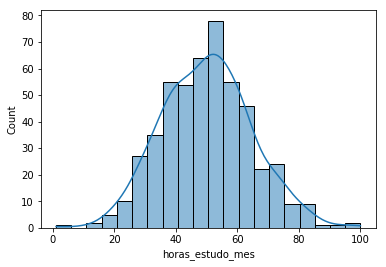

In [20]:
#Histograma da variável preditora
sns.histplot(data=df_dsa, x = 'horas_estudo_mes', kde = True)